References:
https://drive.google.com/drive/folders/1ysYFAvZQmwQ4dX3TT0r2ygYGDe64bycY?usp=sharing
https://www.coursera.org/learn/convolutional-neural-networks-tensorflow/lecture/QE6Iw/working-through-the-notebook
https://www.coursera.org/learn/introduction-tensorflow/lecture/PjlKf/implementing-convolutional-layers 
https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%202%20-%20Lesson%202%20-%20Notebook.ipynb#scrollTo=Wpr8GxjOU8in 

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from google.colab import files
from keras.preprocessing import image
import os

###Mount Google Drive

In [52]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [53]:
train_dir = "/content/drive/MyDrive/Bangkit Final Project Files/Dataset/Training/Training_den"
validation_dir =  "/content/drive/MyDrive/Bangkit Final Project Files/Dataset/Validation"

#train_yes_dir = '/content/drive/MyDrive/Bangkit Final Project Files/Dataset/Training/Yes'
#train_no_dir = '/content/drive/MyDrive/Bangkit Final Project Files/Dataset/Training/No'
#validation_yes_dir = '/content/drive/MyDrive/Bangkit Final Project Files/Dataset/Validation/Yes'
#validation_no_dir = '/content/drive/MyDrive/Bangkit Final Project Files/Dataset/Validation/No'

#train_yes_fnames = os.listdir( train_yes_dir )
#train_no_fnames = os.listdir( train_no_dir )

In [43]:
#os.mkdir("Dataset/Training/Training_den")

In [47]:
#path that contains folder you want to copy
#%cd /content/drive/MyDrive/Bangkit Final Project Files/Dataset/Training
#%cp -av Yes/ Caries_Copy

/content/drive/.shortcut-targets-by-id/1vt7nUPkyCSu1u7upacmsHpjYl3SHjXgt/Bangkit Final Project Files/Dataset/Training
'Yes/' -> 'Caries_Copy'
'Yes/yes.025.tif' -> 'Caries_Copy/yes.025.tif'
'Yes/yes.400.jpg' -> 'Caries_Copy/yes.400.jpg'
'Yes/yes.401.jpg' -> 'Caries_Copy/yes.401.jpg'
'Yes/yes.402.jpg' -> 'Caries_Copy/yes.402.jpg'
'Yes/yes.403.jpg' -> 'Caries_Copy/yes.403.jpg'
'Yes/yes.002.jpg' -> 'Caries_Copy/yes.002.jpg'
'Yes/yes.001.jpg' -> 'Caries_Copy/yes.001.jpg'
'Yes/yes.003.jpg' -> 'Caries_Copy/yes.003.jpg'
'Yes/yes.004.jpg' -> 'Caries_Copy/yes.004.jpg'
'Yes/yes.005.jpg' -> 'Caries_Copy/yes.005.jpg'
'Yes/yes.006.jpg' -> 'Caries_Copy/yes.006.jpg'
'Yes/yes.007.jpg' -> 'Caries_Copy/yes.007.jpg'
'Yes/yes.008.jpg' -> 'Caries_Copy/yes.008.jpg'
'Yes/yes.009.jpg' -> 'Caries_Copy/yes.009.jpg'
'Yes/yes.010.jpg' -> 'Caries_Copy/yes.010.jpg'
'Yes/yes.011.jpg' -> 'Caries_Copy/yes.011.jpg'
'Yes/yes.012.jpg' -> 'Caries_Copy/yes.012.jpg'
'Yes/yes.013.jpg' -> 'Caries_Copy/yes.013.jpg'
'Yes/yes.014

In [ ]:
#print('total training yes images :', len(os.listdir( train_yes_dir ) ))
#print('total training no images :', len(os.listdir( train_no_dir ) ))
#print('total validation yes images: ', len(os.listdir(validation_yes_dir)))
#print('total validation no images: ', len(os.listdir(validation_no_dir)))

###Augmentation

In [56]:
# All images will be rescaled by 1./255.
#train_datagen = ImageDataGenerator( rescale = 1.0/255. )
#test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

#Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=3,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     


validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=3,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 93 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


###Modeling

In [57]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)            

In [39]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=31,
                              epochs=30,
                              validation_steps=16)
                              #verbose=2)

Epoch 1/30
31/31 [==============================] - 12s 386ms/step - loss: 0.5609 - accuracy: 0.7527 - val_loss: 1.3755 - val_accuracy: 0.5625
Epoch 2/30
31/31 [==============================] - 12s 389ms/step - loss: 0.6156 - accuracy: 0.7419 - val_loss: 0.5493 - val_accuracy: 0.7500
Epoch 3/30
31/31 [==============================] - 12s 389ms/step - loss: 0.5017 - accuracy: 0.8065 - val_loss: 0.5141 - val_accuracy: 0.7500
Epoch 4/30
31/31 [==============================] - 12s 387ms/step - loss: 0.4991 - accuracy: 0.7957 - val_loss: 0.4993 - val_accuracy: 0.7708
Epoch 5/30
31/31 [==============================] - 12s 386ms/step - loss: 0.5099 - accuracy: 0.7634 - val_loss: 0.6909 - val_accuracy: 0.7292
Epoch 6/30
31/31 [==============================] - 12s 373ms/step - loss: 0.4853 - accuracy: 0.7957 - val_loss: 1.8851 - val_accuracy: 0.5417
Epoch 7/30
31/31 [==============================] - 12s 386ms/step - loss: 0.5369 - accuracy: 0.7957 - val_loss: 0.5298 - val_accuracy: 0.6875

###Testing

In [ ]:
uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes)
  
  if classes[0]>0:
    print("Caries are founded.")
    
  else:
    print("The teeth are healthy.")
 

Saving 12A1268D-02D9-494B-9D6E-5AF277C80C86.jpg to 12A1268D-02D9-494B-9D6E-5AF277C80C86.jpg
[[0.]]
The teeth are healthy.


###Model evaluation

Text(0.5, 1.0, 'Training and validation loss')

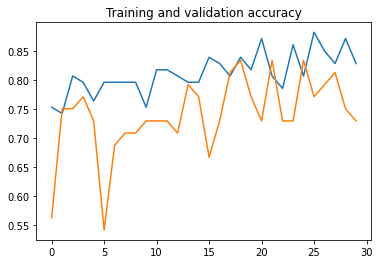

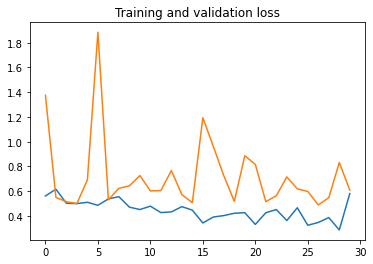

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )